In [42]:
# Load libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder

In [43]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

In [44]:
train_file_name = r'train.csv'
data = pd.read_csv(train_file_name)
print(data.shape)
data.head(10)

(188318, 132)


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718,0.335,0.303,0.671,0.835,0.570,0.595,0.822,0.715,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.439,0.437,0.601,0.351,0.439,0.338,0.366,0.611,0.304,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.290,0.316,0.273,0.261,0.324,0.381,0.373,0.196,0.774,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.441,0.391,0.318,0.321,0.445,0.328,0.322,0.605,0.603,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178,0.247,0.246,0.221,0.212,0.205,0.202,0.246,0.433,2763.85
5,13,A,B,A,A,A,A,A,A,B,...,0.364,0.401,0.268,0.462,0.506,0.367,0.359,0.345,0.727,5142.87
6,14,A,A,A,A,B,A,A,A,A,...,0.382,0.364,0.246,0.405,0.472,0.335,0.352,0.342,0.383,1132.22
7,20,A,B,A,B,A,A,A,A,B,...,0.867,0.583,0.903,0.848,0.802,0.644,0.786,0.860,0.242,3585.75
8,23,A,B,B,B,B,A,A,A,B,...,0.629,0.384,0.612,0.382,0.511,0.682,0.669,0.756,0.361,10280.20
9,24,A,B,A,A,B,B,A,A,B,...,0.713,0.469,0.303,0.671,0.835,0.863,0.879,0.822,0.295,6184.59


In [45]:
columns = data.columns
cat_columns = [col for col in columns if 'cat' in col]

#cat_columns = ['cat1']

print(cat_columns)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111

In [46]:
for col in cat_columns:
    #print col
    encoder = LabelEncoder()
    encoder.fit(data[col])
    labels = encoder.transform(data[col])
    #print len(labels)
    data[col] = labels

In [47]:
data.head(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718,0.335,0.303,0.671,0.835,0.570,0.595,0.822,0.715,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.439,0.437,0.601,0.351,0.439,0.338,0.366,0.611,0.304,1283.60
2,5,0,1,0,0,1,0,0,0,1,...,0.290,0.316,0.273,0.261,0.324,0.381,0.373,0.196,0.774,3005.09
3,10,1,1,0,1,0,0,0,0,1,...,0.441,0.391,0.318,0.321,0.445,0.328,0.322,0.605,0.603,939.85
4,11,0,1,0,1,0,0,0,0,1,...,0.178,0.247,0.246,0.221,0.212,0.205,0.202,0.246,0.433,2763.85
5,13,0,1,0,0,0,0,0,0,1,...,0.364,0.401,0.268,0.462,0.506,0.367,0.359,0.345,0.727,5142.87
6,14,0,0,0,0,1,0,0,0,0,...,0.382,0.364,0.246,0.405,0.472,0.335,0.352,0.342,0.383,1132.22
7,20,0,1,0,1,0,0,0,0,1,...,0.867,0.583,0.903,0.848,0.802,0.644,0.786,0.860,0.242,3585.75
8,23,0,1,1,1,1,0,0,0,1,...,0.629,0.384,0.612,0.382,0.511,0.682,0.669,0.756,0.361,10280.20
9,24,0,1,0,0,1,1,0,0,1,...,0.713,0.469,0.303,0.671,0.835,0.863,0.879,0.822,0.295,6184.59


In [48]:
#get list of categorical columns
#convert all columns
data.describe()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000,188318.000,188318.000,188318.000,188318.000,188318.000,188318.000,188318.000,188318.000,188318.000,...,188318.000,188318.000,188318.000,1.883e+05,188318.000,188318.000,188318.000,1.883e+05,188318.000,188318.000
mean,294135.983,0.248,0.433,0.055,0.318,0.343,0.301,0.024,0.059,0.399,...,0.491,0.485,0.486,4.855e-01,0.498,0.494,0.493,4.931e-01,0.496,3037.338
std,169336.085,0.432,0.496,0.228,0.466,0.475,0.459,0.154,0.235,0.490,...,0.205,0.178,0.199,1.817e-01,0.186,0.210,0.209,2.128e-01,0.222,2904.086
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.013,0.070,0.237,8.000e-05,0.000,0.035,0.036,2.280e-04,0.180,0.670
25%,147748.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.336,0.350,0.313,3.590e-01,0.365,0.311,0.312,3.158e-01,0.295,1204.460
50%,294539.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.441,0.438,0.441,4.415e-01,0.461,0.457,0.462,3.635e-01,0.407,2115.570
75%,440680.500,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,...,0.655,0.591,0.624,5.668e-01,0.615,0.679,0.676,6.900e-01,0.725,3864.045
max,587633.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.997,1.000,0.980,9.954e-01,0.995,0.999,0.998,9.885e-01,0.845,121012.250


In [49]:
#identify outliers
data = data[data['loss'] < 75000]

In [50]:
data.head(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718,0.335,0.303,0.671,0.835,0.570,0.595,0.822,0.715,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.439,0.437,0.601,0.351,0.439,0.338,0.366,0.611,0.304,1283.60
2,5,0,1,0,0,1,0,0,0,1,...,0.290,0.316,0.273,0.261,0.324,0.381,0.373,0.196,0.774,3005.09
3,10,1,1,0,1,0,0,0,0,1,...,0.441,0.391,0.318,0.321,0.445,0.328,0.322,0.605,0.603,939.85
4,11,0,1,0,1,0,0,0,0,1,...,0.178,0.247,0.246,0.221,0.212,0.205,0.202,0.246,0.433,2763.85
5,13,0,1,0,0,0,0,0,0,1,...,0.364,0.401,0.268,0.462,0.506,0.367,0.359,0.345,0.727,5142.87
6,14,0,0,0,0,1,0,0,0,0,...,0.382,0.364,0.246,0.405,0.472,0.335,0.352,0.342,0.383,1132.22
7,20,0,1,0,1,0,0,0,0,1,...,0.867,0.583,0.903,0.848,0.802,0.644,0.786,0.860,0.242,3585.75
8,23,0,1,1,1,1,0,0,0,1,...,0.629,0.384,0.612,0.382,0.511,0.682,0.669,0.756,0.361,10280.20
9,24,0,1,0,0,1,1,0,0,1,...,0.713,0.469,0.303,0.671,0.835,0.863,0.879,0.822,0.295,6184.59


In [51]:
len(data.columns) - 1

131

In [52]:
#exclude id and output columns from the input columns
exclude_cols = ['id', 'loss']
data_columns = [col for col in data.columns if col not in exclude_cols]

In [53]:
columns = data.columns
continous_columns = [col for col in columns if 'cont' in col]

In [54]:
#FOR TESTING WITH ONLY THE CONTINUOUS DATA COLUMNS
data_columns = continous_columns

In [55]:
array = data[data_columns].values
X = data[data_columns].values
Y = data['loss'].values

In [63]:
len(Y)

188314

In [56]:
validation_size = 0.20
seed = 7
# X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,
#     test_size=validation_size, random_state=seed)

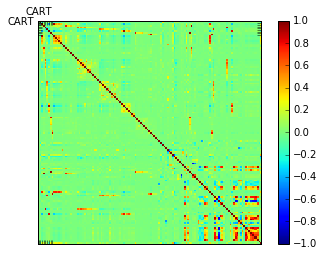

In [66]:
#correlation matrix plot - see the correleation between features
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy

correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [69]:
correlations

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,1.000e+00,6.742e-03,-3.388e-04,1.451e-04,0.003,6.276e-05,-0.005,-4.009e-03,-3.471e-04,-5.216e-04,...,1.421e-03,2.224e-03,5.532e-03,1.854e-03,2.587e-03,1.087e-03,9.007e-04,4.298e-04,-4.932e-03,-9.184e-04
cat1,6.742e-03,1.000e+00,-1.682e-01,-9.725e-02,-0.027,1.244e-02,0.079,-6.929e-02,-8.426e-02,-1.592e-01,...,4.105e-02,4.346e-02,9.235e-03,3.511e-02,4.738e-02,4.549e-02,4.502e-02,1.864e-02,2.278e-02,-2.247e-01
cat2,-3.388e-04,-1.682e-01,1.000e+00,1.392e-01,-0.033,-6.287e-02,-0.438,7.074e-02,1.039e-03,9.324e-01,...,-7.076e-02,-4.908e-02,-3.599e-02,-6.542e-02,-7.795e-02,-6.113e-02,-6.129e-02,-5.990e-02,-2.063e-02,2.321e-01
cat3,1.451e-04,-9.725e-02,1.392e-01,1.000e+00,-0.017,-2.142e-02,-0.051,8.428e-02,1.229e-01,1.405e-01,...,-2.647e-02,-2.142e-02,-5.470e-03,-3.302e-02,-3.338e-02,-2.252e-02,-2.313e-02,-9.425e-03,-1.208e-03,1.957e-01
cat4,2.501e-03,-2.745e-02,-3.331e-02,-1.695e-02,1.000,-2.796e-01,-0.132,3.189e-02,3.485e-03,-3.273e-02,...,-1.470e-02,-1.872e-02,-2.059e-03,-1.064e-03,-1.251e-02,-1.155e-02,-1.084e-02,-1.373e-02,-1.959e-02,1.071e-01
cat5,6.276e-05,1.244e-02,-6.287e-02,-2.142e-02,-0.280,1.000e+00,-0.167,2.670e-02,1.445e-02,-7.010e-02,...,3.039e-02,1.058e-03,2.414e-02,4.296e-02,3.864e-02,2.494e-02,2.604e-02,2.883e-02,-1.641e-02,1.079e-01
cat6,-4.516e-03,7.921e-02,-4.380e-01,-5.075e-02,-0.132,-1.674e-01,1.000,-4.885e-02,-5.815e-02,-4.098e-01,...,5.649e-02,4.203e-02,3.062e-02,4.003e-02,4.723e-02,4.791e-02,4.743e-02,6.323e-02,2.280e-02,-1.178e-01
cat7,-4.009e-03,-6.929e-02,7.074e-02,8.428e-02,0.032,2.670e-02,-0.049,1.000e+00,5.619e-02,7.160e-02,...,-7.369e-03,5.322e-03,2.767e-03,-7.758e-03,-4.982e-03,4.378e-03,3.288e-03,-5.516e-03,-5.294e-03,2.837e-01
cat8,-3.471e-04,-8.426e-02,1.039e-03,1.229e-01,0.003,1.445e-02,-0.058,5.619e-02,1.000e+00,-9.609e-04,...,-2.313e-02,3.859e-03,-5.079e-03,-2.012e-02,-3.003e-02,-3.144e-03,-3.375e-03,-3.045e-02,-1.473e-03,8.643e-02
cat9,-5.216e-04,-1.592e-01,9.324e-01,1.405e-01,-0.033,-7.010e-02,-0.410,7.160e-02,-9.609e-04,1.000e+00,...,-6.173e-02,-4.366e-02,-3.075e-02,-5.763e-02,-6.816e-02,-5.056e-02,-5.075e-02,-4.968e-02,-1.666e-02,2.241e-01


In [72]:
loss_col = correlations['loss']

In [75]:
loss_col.to_dict()

{'cat1': -0.22469431911909443,
 'cat10': 0.28541716185051053,
 'cat100': 0.058177786402985848,
 'cat101': 0.35647262439523875,
 'cat102': 0.083252283596655929,
 'cat103': 0.15612977723233359,
 'cat104': 0.031245426066809332,
 'cat105': 0.11166181889415489,
 'cat106': -0.065214295027564775,
 'cat107': 0.00063301440383249576,
 'cat108': 0.004513281106812591,
 'cat109': 0.022236831809992665,
 'cat11': 0.22734938018150719,
 'cat110': -0.02199357382356542,
 'cat111': 0.15151984305752422,
 'cat112': -0.02806468577387956,
 'cat113': -0.021566571475500583,
 'cat114': -0.0270231146828811,
 'cat115': -0.01625236547067492,
 'cat116': 0.033044601496345978,
 'cat12': 0.31468671965584122,
 'cat13': 0.22437436860214222,
 'cat14': 0.10411579363046079,
 'cat15': 0.0018313182231429706,
 'cat16': 0.19350182259325649,
 'cat17': 0.079619412682227789,
 'cat18': 0.042483226587711524,
 'cat19': 0.035571739825263723,
 'cat2': 0.23205728978296164,
 'cat20': 0.031724280909183708,
 'cat21': 0.0065421115604176426,

In [57]:
num_folds = 10
num_instances = len(X)
seed = 7
scoring =  'mean_squared_error'

In [58]:
models = []
# models.append(( 'LR' , LinearRegression()))
# models.append(( 'LASSO' , Lasso()))
# models.append(( 'EN' , ElasticNet()))
# models.append(( 'KNN' , KNeighborsRegressor()))
models.append(( 'CART' , DecisionTreeRegressor()))
#models.append(( 'SVR' , SVR()))

In [59]:
results = []
names = []
for name, model in models:
  kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_validation.cross_val_score(model, X, Y, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

CART: -16088102.660097 (251978.013380)


In [60]:
pipelines = []
pipelines.append(( 'ScaledLR' , Pipeline([( 'Scaler' , StandardScaler()),( 'LR' ,
    LinearRegression())])))
pipelines.append(( 'ScaledLASSO' , Pipeline([( 'Scaler' , StandardScaler()),( 'LASSO' ,
    Lasso())])))
￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼pipelines.append(( 'ScaledEN' , Pipeline([( 'Scaler' , StandardScaler()),( 'EN' ,
    ElasticNet())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsRegressor())])))
pipelines.append(( 'ScaledCART' , Pipeline([( 'Scaler' , StandardScaler()),( 'CART' ,
    DecisionTreeRegressor())])))
pipelines.append(( 'ScaledSVR' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVR' , SVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

SyntaxError: invalid syntax (<ipython-input-60-f50ea1a70439>, line 6)